# Homework 2
Eric Gagliano (egagli)

# Problem 1

Using the observations of peak flow data for the Sauk River, we are going to investigate whether a change in flood statistics occurred around 1977.

## A. Descriptive Plots: Decide which of your plots from Homework 1 are relevant to the question of whether a change in flood statistics occurred in the Sauk River around 1977.

* Include these plots from Homework 1 here.
* Discuss what you can see visually in the graphs that would lead you to believe that a change has or has not occurred.

In [1]:
#import all required modules and read in the data files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
Sauk_data_file = 'Sauk_peak_WY1929_2017.xlsx'
Sauk_data = pd.read_excel(Sauk_data_file,header=6)
Sauk_data = Sauk_data[1:]
Sauk_data['peak_va'] = Sauk_data['peak_va'].astype('int64')

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
# subset data by year 
Sauk_data_before_1977 = Sauk_data[Sauk_data['water_year']<1977]
Sauk_data_after_1977 = Sauk_data[Sauk_data['water_year']>=1977]

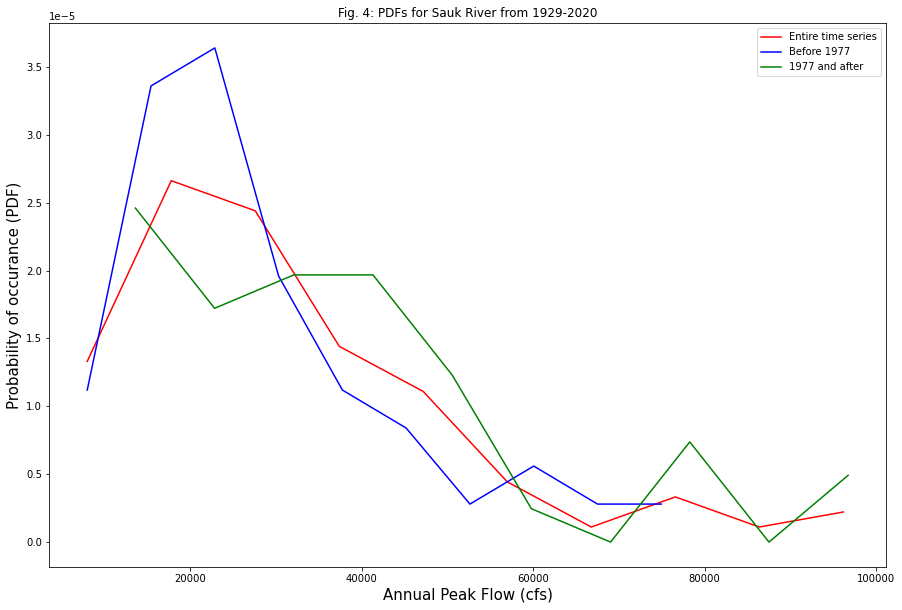

In [3]:
# create PDFs using histogram method outlined in emperical-distrubtions.ipynb
f,ax = plt.subplots(figsize=(15,10))
counts0, bin_edges0 = np.histogram(Sauk_data['peak_va'], bins=10, density=True)
counts1, bin_edges1 = np.histogram(Sauk_data_before_1977['peak_va'], bins=10, density=True)
counts2, bin_edges2 = np.histogram(Sauk_data_after_1977['peak_va'], bins=10, density=True)
ax.plot(bin_edges0[:-1],counts0,color='r',label='Entire time series')
ax.plot(bin_edges1[:-1],counts1,color='b',label='Before 1977')
ax.plot(bin_edges2[:-1],counts2,color='g',label='1977 and after')
ax.legend()
ax.set_title('Fig. 4: PDFs for Sauk River from 1929-2020')
ax.set_xlabel('Annual Peak Flow (cfs)', fontsize=15)
ax.set_ylabel('Probability of occurance (PDF)', fontsize=15);

In [4]:
# The following cunnane_quantile() function taken from Steven Pestana: (https://mountain-hydrology-research-group.github.io/data-analysis/modules/lab1/empirical-distributions.ipynb)
def cunnane_quantile(df, column_name): 
    '''This function will compute the Cunnane plotting position for the values in a column of a dataframe.
    It requres a pandas dataframe, and the column name of interest (a text string) as inputs.
    The output is a new dataframe, ranked (sorted) with an extra column with the plotting position.'''
    
    # Rank all our values
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    
    # Calculate the Cunnane plotting position
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) / (ranked_df[column_name].count() + (1/5))
        
    return ranked_df

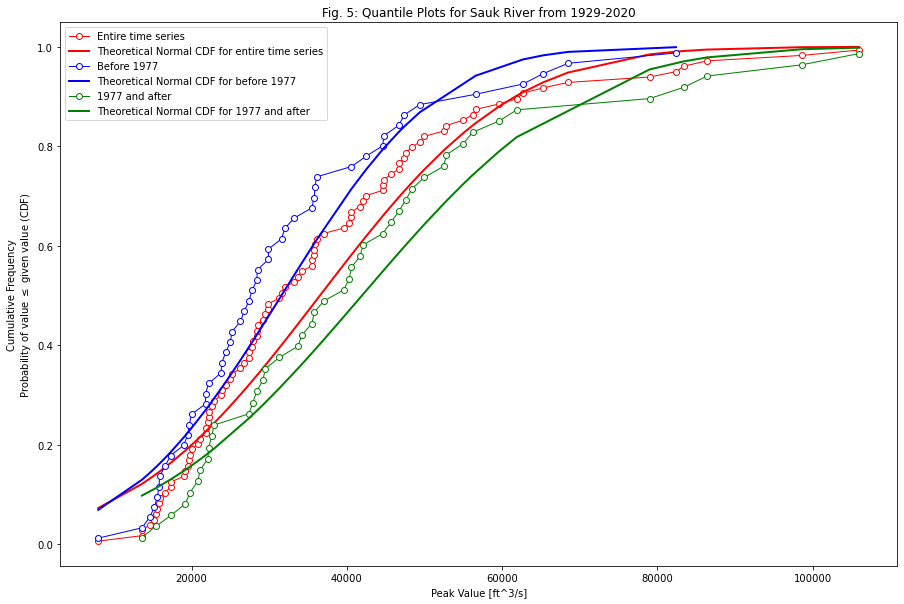

In [5]:
# get mean and std for CDF calculation for each time period and plot on quantile plot
sample_values0 = Sauk_data['peak_va'].sort_values()
sample_mean0 = Sauk_data['peak_va'].mean()
sample_std0 = Sauk_data['peak_va'].std(ddof=1) 
normal_cdf0 = stats.norm.cdf(sample_values0, sample_mean0, sample_std0)
sample_values1 = Sauk_data_before_1977['peak_va'].sort_values()
sample_mean1 = Sauk_data_before_1977['peak_va'].mean()
sample_std1 = Sauk_data_before_1977['peak_va'].std(ddof=1)
normal_cdf1 = stats.norm.cdf(sample_values1, sample_mean1, sample_std1)
sample_values2 = Sauk_data_after_1977['peak_va'].sort_values()
sample_mean2 = Sauk_data_after_1977['peak_va'].mean()
sample_std2 = Sauk_data_after_1977['peak_va'].std(ddof=1) 
normal_cdf2 = stats.norm.cdf(sample_values2, sample_mean2, sample_std2)


f,ax = plt.subplots(figsize=(15,10))
cunnane_quantile(Sauk_data,'peak_va').plot(ax=ax,x='peak_va',y='cunnane_plotting_position',linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='r', 
               color='r',label='Entire time series')
ax.plot(sample_values0,normal_cdf0,'r-', lw=2, label='Theoretical Normal CDF for entire time series')
cunnane_quantile(Sauk_data_before_1977,'peak_va').plot(ax=ax,x='peak_va',y='cunnane_plotting_position',linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='b', 
               color='b',label='Before 1977')
ax.plot(sample_values1,normal_cdf1,'b-', lw=2, label='Theoretical Normal CDF for before 1977')
cunnane_quantile(Sauk_data_after_1977,'peak_va').plot(ax=ax,x='peak_va',y='cunnane_plotting_position',linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='g', 
               color='g',label='1977 and after')
ax.plot(sample_values2,normal_cdf2,'g-', lw=2, label='Theoretical Normal CDF for 1977 and after')

ax.legend()
ax.set_title('Fig. 5: Quantile Plots for Sauk River from 1929-2020')
ax.set_xlabel('Peak Value [ft^3/s]')
ax.set_ylabel('Cumulative Frequency\nProbability of value $\leq$ given value (CDF)');

Using these plots from homework 1, we can visually see a change in mean from 1929-1977 to 1977-2020. Figure 4 shows the PDFs of the two time periods, and we can see a visual and marked shift to the right from pre-1977 to post-1977 which indicates a distribution with higher values and thus a higher mean. We can see in figure 5 that the quantile plots from post-1977 are very clearly uniformly shifted to the right as well, also indicating a positive shift in distribution. 

## B. Two-sample test for a change in the mean: Test for statistical significance of the observed change in the mean annual peak flow around 1977.

* Use a two sample test, and alpha = 0.05 (95% confidence) and the z-distribution to define the rejection region.
* Discuss why using the z-distribution is appropriate here.
* Use the two-sample test to compare the data from 1977-2020 to the data from 1929-1976, accounting for the different sample sizes and sample standard deviations appropriately (remember to use the “pooled standard deviation”).
* For your null hypothesis, postulate that the difference between the two means = 0, and state the alternative hypothesis that the difference has changed (although you don't know the direction of this change) and state the test statistic you'll be using.
* Can you reject the null hypothesis?
* Calculate P after your test.
* How does your estimate of P change if your null hypothesis is that the difference in the mean between the two data sets is equal to 25% of the pre-1977 sample mean? (In other words, test with a new null hypothesis: the mean of the second period is 1.25 times the mean of the first period.)

In [62]:
alpha = 0.05
lower_z_cutoff = stats.norm.ppf(alpha/2)
upper_z_cutoff = stats.norm.ppf(1-alpha/2)

mean_before = Sauk_data_before_1977['peak_va'].mean()
mean_after = Sauk_data_after_1977['peak_va'].mean()
std_before = Sauk_data_before_1977['peak_va'].std(ddof=1)
std_after = Sauk_data_after_1977['peak_va'].std(ddof=1)
std_pooled = np.sqrt(std_before**2/Sauk_data_before_1977['peak_va'].count()+std_after**2/Sauk_data_after_1977['peak_va'].count())
delta_0 = 0
delta_25 = 0.25*mean_before
z_test = ((mean_after - mean_before) - delta_0) / std_pooled
z_test_25 = ((mean_after - mean_before) - delta_25) / std_pooled
p = 1 - stats.norm.cdf(z_test)
p_25 = 1 - stats.norm.cdf(z_test_25)
print(f'for X_2-X_1 = 0, z = {np.round(z_test,2)}')
print(f'for X_2-X_1 = 0, p = {np.round(p,2)}')
print(f'for X_2-X_1 = 0.25*X_1, z = {np.round(z_test_25,4)}')
print(f'for X_2-X_1 = 0.25*X_1, p = {np.round(p_25,4)}')


for X_2-X_1 = 0, z = 2.58
for X_2-X_1 = 0, p = 0.0
for X_2-X_1 = 0.25*X_1, z = 0.6165
for X_2-X_1 = 0.25*X_1, p = 0.2688


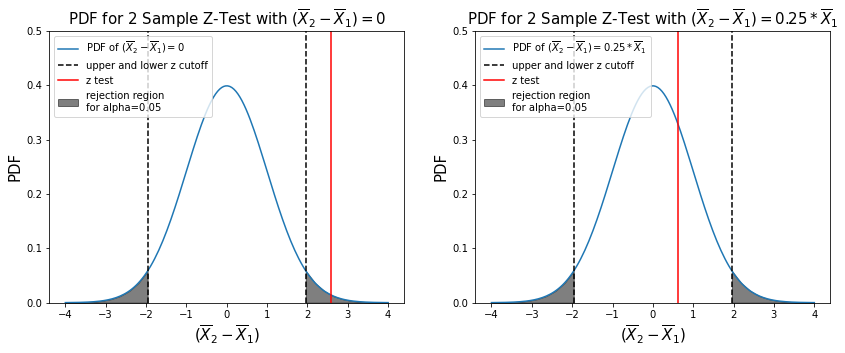

In [69]:
f, ax = plt.subplots(1,2,figsize=(14,5))
x = np.linspace(-4, 4, num=160)
ax[0].plot(x, stats.norm.pdf(x, 0, 1), label='PDF of $(\overline{X}_2 - \overline{X}_1)=0$')
ax[0].axvline(lower_z_cutoff, color='black', linestyle='--', label=f'upper and lower z cutoff')
ax[0].axvline(upper_z_cutoff, color='black', linestyle='--')
ax[0].axvline(z_test, color='red', linestyle='-', label=f'z test')
shade1 = np.linspace(upper_z_cutoff, np.max(x), 10)
ax[0].fill_between(shade1, stats.norm.pdf(shade1, 0, 1) ,  color='k', alpha=0.5, label='rejection region\nfor alpha={}'.format(np.round(alpha,2)))
shade2 = np.linspace(np.min(x), lower_z_cutoff, 10)
ax[0].fill_between(shade2, stats.norm.pdf(shade2, 0, 1) ,  color='k', alpha=0.5)

ax[0].set_ylim((0,0.5))
ax[0].set_title('PDF for 2 Sample Z-Test with $(\overline{X}_2 - \overline{X}_1)=0$',fontsize=15)
ax[0].set_xlabel('($\overline{X}_2 - \overline{X}_1$)', fontsize=15)
ax[0].set_ylabel('PDF', fontsize=15)
ax[0].legend()

ax[1].plot(x, stats.norm.pdf(x, 0, 1), label='PDF of $(\overline{X}_2 - \overline{X}_1)=0.25*\overline{X}_1$')
ax[1].axvline(lower_z_cutoff, color='black', linestyle='--', label=f'upper and lower z cutoff')
ax[1].axvline(upper_z_cutoff, color='black', linestyle='--')
ax[1].axvline(z_test_25, color='red', linestyle='-', label=f'z test')
shade1 = np.linspace(upper_z_cutoff, np.max(x), 10)
ax[1].fill_between(shade1, stats.norm.pdf(shade1, 0, 1) ,  color='k', alpha=0.5, label='rejection region\nfor alpha={}'.format(np.round(alpha,2)))
shade2 = np.linspace(np.min(x), lower_z_cutoff, 10)
ax[1].fill_between(shade2, stats.norm.pdf(shade2, 0, 1) ,  color='k', alpha=0.5)

ax[1].set_ylim((0,0.5))
ax[1].set_title('PDF for 2 Sample Z-Test with $(\overline{X}_2 - \overline{X}_1)=0.25*\overline{X}_1$',fontsize=15)
ax[1].set_xlabel('($\overline{X}_2 - \overline{X}_1$)', fontsize=15)
ax[1].set_ylabel('PDF', fontsize=15)
ax[1].legend()

## C. Type II Error: What is the type II error and power for your test on the mean in the first part of B above?

To answer this, assume that the true mean has in fact increased by 25%, and pooled standard deviation has increased by a factor of 1.2. In other words, assume that the “true” mean of the later period is 1.25 times the 1929-1976 mean, and that the “true” pooled standard deviation is 1.2 times sigma prime (our test estimate of pooled estimator for the two observed data sets).
Draw or plot a graphic to represent this true distribution, and draw where your test statistic falls on this graph. Color the area of the graph that represents Type II error.
Then answer the question - what is the type II error and power for your test in part B?

In [ ]:
conf = 1 - alpha


## D. Wilcoxan Rank Sum Test:

Now test the significance of the change in the mean between the two sample periods using the two-sample Wilcoxan Rank Sum test.
How different is your conclusion from the one in part B. (i.e. compare P for the two tests).

## E. Chi Squared test for a change in the standard deviation: Lastly test for statistical significance of a change in the standard deviation.

Even though it is not strictly true, assume that the sample data are derived from a normally distributed population. (While not required for this homework, we can follow up on the importance of this assumption by using Monte Carlo Tests as shown in Lab 2-3.)
Use a single sample test (with rejection region based on the Chi Squared distribution), and assume that the sample standard deviation that you calculated from the 1929-1976 data is close to the true population standard deviation that you are testing for a change from.

## Problem 2: Course Project Selection (CEWA 565 only)
Write a brief paragraph (3-9 sentences) describing your term project. Include the name of your partner (or specify you will be doing the project alone), the data you will analyze, and which question(s) you will answer. Which statistical tools will you use? If you have a hypothesis to test, write it down. If you have questions about the project, now is the time to talk to the instructor.

Seth Vanderwilt and I will be exploring using Synthetic Aperture Radar (SAR) backscatter time series to explore snow melt dynamics during this past summer. We hope to focus on snow melt timings and how they might have differed from previous years to this year, particularly over Mt. Rainier. Mt. Rainier will be a good test site because we know it experienced a quite extreme melt season this year, as well as the fact that other groups will also be looking at Mt. Rainier, which will hopefully allow some intercomparison. We will use a statistical test for significance: our null hypothesis is that snow melt timing this past summer is not different from previous years, and the alternate hyopthesis is that snow melt timing this past summer is different from previous years. --aspect, elevation, other spatial factors

# References

Note: A large amount of this code is 